### Problem Statement
Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like Apple, Alienware, HP etc.
He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things.
Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS etc) and its selling price. But he is not so good at Data Mining.
To solve this problem he already asked his Data Engineering team to collect laptop data from various competitors.
Now he needs your (i.e Data Scientist’s) help to solve the following problem.

### Step- 1 (Data Analysis and Mining)
Musk’s Requirements:
Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction.
Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.

### Sprint - 2 (ML Model Tuning)
Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.
First try to check if the models you have created are a best fit or not.
See if applying cross validation helps improve your models performance.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [109]:
df = pd.read_csv("./laptop_details (1).csv")

In [110]:
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


In [111]:
df.shape


(720, 4)

In [112]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


### Extract brand details from product column

In [113]:
df['Brand']=df['Product'].str.split(expand=True)[0]

In [114]:
df

,Product,Rating,MRP,Feature,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS
...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS


### Extract RAM,Screen_Size,OS,Processor and Storage details from Feature column

In [115]:
regex=r"\d+\sGB[\s\w]+RAM"
df['RAM']=df["Feature"].apply(lambda x : re.search(regex, x).group() if re.search(regex,x) !=None else np.NaN)

In [116]:
df

,Product,Rating,MRP,Feature,Brand,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB DDR4 RAM
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM
...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,4 GB LPDDR4 RAM
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo,8 GB DDR4 RAM
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS,16 GB DDR5 RAM
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,16 GB LPDDR5 RAM


In [117]:
regex=r"\d{1,2}\.\d{1,2}\scm"
df['Screen_Size']=df["Feature"].apply(lambda x : re.search(regex, x).group() if re.search(regex,x)!=None else np.NaN)

In [118]:
df

,Product,Rating,MRP,Feature,Brand,RAM,Screen_Size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM,35.56 cm
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM,39.62 cm
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM,39.62 cm
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB DDR4 RAM,39.62 cm
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM,39.62 cm
...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,4 GB LPDDR4 RAM,29.46 cm
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo,8 GB DDR4 RAM,39.62 cm
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS,16 GB DDR5 RAM,39.62 cm
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,16 GB LPDDR5 RAM,35.56 cm


In [119]:
regex=r"(?:Chrome|Mac|Windows|DOS)\s(\d+)?"
df['OS']=df["Feature"].apply(lambda x : re.search(regex, x).group() if re.search(regex,x)!=None else np.NaN)

In [120]:
df

,Product,Rating,MRP,Feature,Brand,RAM,Screen_Size,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM,35.56 cm,Windows 11
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM,39.62 cm,Windows 11
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM,39.62 cm,Windows 11
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB DDR4 RAM,39.62 cm,Windows 10
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM,39.62 cm,Windows 11
...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,4 GB LPDDR4 RAM,29.46 cm,Chrome
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo,8 GB DDR4 RAM,39.62 cm,Windows 11
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS,16 GB DDR5 RAM,39.62 cm,Windows 11
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,16 GB LPDDR5 RAM,35.56 cm,Windows 11


In [121]:
regex=r"(?:\d{2,})?\d\s(?:GB|TB)\s(?:SSD|HDD)"
df['Storage']=df["Feature"].apply(lambda x : re.search(regex, x).group() if re.search(regex,x)!=None else np.NaN)


In [122]:
df

,Product,Rating,MRP,Feature,Brand,RAM,Screen_Size,OS,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM,35.56 cm,Windows 11,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB DDR4 RAM,39.62 cm,Windows 10,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,4 GB LPDDR4 RAM,29.46 cm,Chrome,NaN
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS,16 GB DDR5 RAM,39.62 cm,Windows 11,1 TB SSD
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,16 GB LPDDR5 RAM,35.56 cm,Windows 11,512 GB SSD


In [123]:
regex=r"(?:Intel|AMD|M1|M2|Qualcomm)\s(?:Core|Ryzen)*(?:[\s\w]+)?Processor"
df['Processor']=df["Feature"].apply(lambda x : re.search(regex, x).group() if re.search(regex,x)!=None else np.NaN)

In [124]:
df

,Product,Rating,MRP,Feature,Brand,RAM,Screen_Size,OS,Storage,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM,35.56 cm,Windows 11,256 GB SSD,Intel Core i3 Processor
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD,Intel Core i3 Processor
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD,Intel Core i3 Processor
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB DDR4 RAM,39.62 cm,Windows 10,512 GB SSD,AMD Ryzen 5 Hexa Core Processor
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD,Intel Core i5 Processor
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,4 GB LPDDR4 RAM,29.46 cm,Chrome,NaN,Intel Celeron Dual Core Processor
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD,AMD Ryzen 7 Octa Core Processor
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS,16 GB DDR5 RAM,39.62 cm,Windows 11,1 TB SSD,AMD Ryzen 9 Octa Core Processor
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,16 GB LPDDR5 RAM,35.56 cm,Windows 11,512 GB SSD,Intel Core i7 Processor


In [125]:
df.dtypes


Product         object
Rating         float64
MRP             object
Feature         object
Brand           object
RAM             object
Screen_Size     object
OS              object
Storage         object
Processor       object
dtype: object

### Data Preprocessing and Cleaning

In [126]:
df['MRP']=df['MRP'].apply(lambda x:x.replace('₹','').replace(',','')).astype(float)

In [127]:
df


,Product,Rating,MRP,Feature,Brand,RAM,Screen_Size,OS,Storage,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM,35.56 cm,Windows 11,256 GB SSD,Intel Core i3 Processor
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD,Intel Core i3 Processor
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD,Intel Core i3 Processor
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB DDR4 RAM,39.62 cm,Windows 10,512 GB SSD,AMD Ryzen 5 Hexa Core Processor
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD,Intel Core i5 Processor
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,4 GB LPDDR4 RAM,29.46 cm,Chrome,NaN,Intel Celeron Dual Core Processor
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo,8 GB DDR4 RAM,39.62 cm,Windows 11,512 GB SSD,AMD Ryzen 7 Octa Core Processor
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS,16 GB DDR5 RAM,39.62 cm,Windows 11,1 TB SSD,AMD Ryzen 9 Octa Core Processor
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,16 GB LPDDR5 RAM,35.56 cm,Windows 11,512 GB SSD,Intel Core i7 Processor


In [128]:
df['Processor']=df['Processor'].str.replace("Processor","")


In [129]:
df["Processor"]=df['Processor'].str.split(expand=True)[0]

In [130]:
df['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [131]:
df['RAM'].value_counts()

8 GB DDR4 RAM                                                                                377
16 GB DDR4 RAM                                                                               153
16 GB DDR5 RAM                                                                                77
4 GB DDR4 RAM                                                                                 26
8 GB LPDDR4X RAM                                                                              16
16 GB LPDDR4X RAM                                                                             16
32 GB DDR5 RAM                                                                                11
16 GB LPDDR5 RAM                                                                               9
4 GB LPDDR4 RAM                                                                                7
16 GB Unified Memory RAM                                                                       6
8 GB Unified Memory RAM       

In [132]:
df['RAM']=df['RAM'].apply(lambda x:x.replace("128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM","8 GB DDR4 RAM ")) 

In [133]:
df["RAM_Type"]=df["RAM"].str.split(expand=True)[2]


In [134]:
df["RAM_Size"]=df["RAM"].str.split(expand=True)[0]+'GB'


In [135]:
df.drop('RAM',axis=1,inplace=True)

In [136]:
df

,Product,Rating,MRP,Feature,Brand,Screen_Size,OS,Storage,Processor,RAM_Type,RAM_Size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,35.56 cm,Windows 11,256 GB SSD,Intel,DDR4,8GB
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,39.62 cm,Windows 11,512 GB SSD,Intel,DDR4,8GB
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,39.62 cm,Windows 11,512 GB SSD,Intel,DDR4,8GB
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,39.62 cm,Windows 10,512 GB SSD,AMD,DDR4,8GB
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,39.62 cm,Windows 11,512 GB SSD,Intel,DDR4,8GB
...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,29.46 cm,Chrome,NaN,Intel,LPDDR4,4GB
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo,39.62 cm,Windows 11,512 GB SSD,AMD,DDR4,8GB
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS,39.62 cm,Windows 11,1 TB SSD,AMD,DDR5,16GB
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,35.56 cm,Windows 11,512 GB SSD,Intel,LPDDR5,16GB


In [137]:
df.isnull().sum()


Product          0
Rating         139
MRP              0
Feature          0
Brand            0
Screen_Size      0
OS               0
Storage         10
Processor        0
RAM_Type         0
RAM_Size         0
dtype: int64

In [138]:
df["Storage"] = df["Storage"].fillna(df["Storage"].mode()[0])


In [139]:
df["Storage_Size"] = df["Storage"].str.split(expand=True)[0]+df["Storage"].str.split(expand=True)[1]

In [140]:
df["Storage_type"] = df["Storage"].str.split(expand=True)[2]

In [141]:
df

,Product,Rating,MRP,Feature,Brand,Screen_Size,OS,Storage,Processor,RAM_Type,RAM_Size,Storage_Size,Storage_type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,35.56 cm,Windows 11,256 GB SSD,Intel,DDR4,8GB,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,39.62 cm,Windows 11,512 GB SSD,Intel,DDR4,8GB,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,39.62 cm,Windows 11,512 GB SSD,Intel,DDR4,8GB,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,39.62 cm,Windows 10,512 GB SSD,AMD,DDR4,8GB,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,39.62 cm,Windows 11,512 GB SSD,Intel,DDR4,8GB,512GB,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,29.46 cm,Chrome,512 GB SSD,Intel,LPDDR4,4GB,512GB,SSD
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo,39.62 cm,Windows 11,512 GB SSD,AMD,DDR4,8GB,512GB,SSD
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS,39.62 cm,Windows 11,1 TB SSD,AMD,DDR5,16GB,1TB,SSD
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS,35.56 cm,Windows 11,512 GB SSD,Intel,LPDDR5,16GB,512GB,SSD


In [142]:
df.drop(columns=['Product','Rating','Feature',"Storage","Screen_Size"],axis=1,inplace=True)

In [143]:
df.isnull().sum()


MRP             0
Brand           0
OS              0
Processor       0
RAM_Type        0
RAM_Size        0
Storage_Size    0
Storage_type    0
dtype: int64

### Cleaned Data

In [144]:
new_df=df[['Brand','OS','Processor','RAM_Size','RAM_Type','Storage_Size','Storage_type','MRP']]
new_df.to_csv('laptop_price.csv', index=False)
new_df.head()

,Brand,OS,Processor,RAM_Size,RAM_Type,Storage_Size,Storage_type,MRP
0,Lenovo,Windows 11,Intel,8GB,DDR4,256GB,SSD,36990.0
1,Lenovo,Windows 11,Intel,8GB,DDR4,512GB,SSD,39990.0
2,ASUS,Windows 11,Intel,8GB,DDR4,512GB,SSD,32990.0
3,HP,Windows 10,AMD,8GB,DDR4,512GB,SSD,49990.0
4,ASUS,Windows 11,Intel,8GB,DDR4,512GB,SSD,49990.0


In [145]:
cols=['Brand','OS','Processor','RAM_Size','RAM_Type','Storage_Size','Storage_type']
for col in cols:
 print("{} has {} unique values".format(col, df[col].nunique()))
 print()
 print("Unique values are\n {}".format(df[col].unique()))
 print()
 print("Value counts\n {}".format(df[col].value_counts()))
 print('*-'*60)
 print()

Brand has 16 unique values

Unique values are
 ['Lenovo' 'ASUS' 'HP' 'DELL' 'RedmiBook' 'realme' 'acer' 'MSI' 'APPLE'
 'Infinix' 'SAMSUNG' 'Ultimus' 'Vaio' 'GIGABYTE' 'Nokia' 'ALIENWARE']

Value counts
 ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: Brand, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

OS has 5 unique values

Unique values are
 ['Windows 11' 'Windows 10' 'Mac ' 'DOS ' 'Chrome ']

Value counts
 Windows 11    564
Windows 10    126
Mac            19
Chrome          7
DOS             4
Name: OS, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

Processor has 5 unique values

U

## EDA

In [146]:
df['MRP'].describe()

count       720.000000
mean      81605.837500
std       61552.955102
min       14990.000000
25%       38996.750000
50%       59990.000000
75%       95240.000000
max      434830.000000
Name: MRP, dtype: float64

Maximum price of laptop is 434830.00 and minimum price of labtop is  14990.00


<AxesSubplot:>

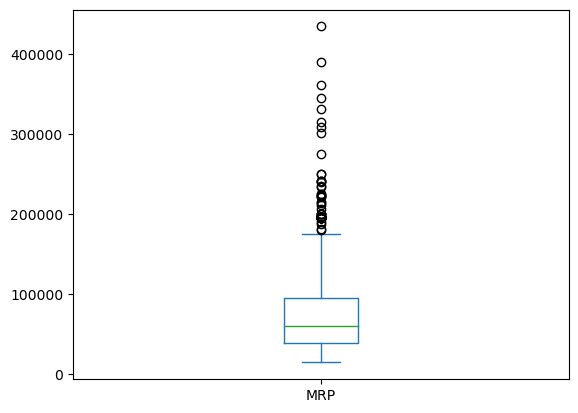

In [147]:
df['MRP'].plot(kind='box')

In [148]:
def find_outliers(df, column, verbose = False):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_boundary = q1 - (1.5 * IQR)
    upper_boundary = q3 + (1.5 * IQR)
    print(upper_boundary)
    outliers = df[(df[column] < lower_boundary) | (df[column] > upper_boundary)]
    if verbose:
        display(outliers)
        print("Outilers Percentage :: ", (len(outliers) / len(df)) * 100, "%")
    return outliers

In [149]:
outliers_MRP = find_outliers(df, "MRP", verbose = True)

179604.875


,MRP,Brand,OS,Processor,RAM_Type,RAM_Size,Storage_Size,Storage_type
15,196990.0,ASUS,Windows 11,AMD,DDR5,16GB,1TB,SSD
27,196990.0,ASUS,Windows 11,AMD,DDR5,16GB,1TB,SSD
41,194990.0,ASUS,Windows 11,AMD,DDR5,16GB,1TB,SSD
56,196990.0,ASUS,Windows 11,AMD,DDR5,16GB,1TB,SSD
70,194990.0,ASUS,Windows 11,AMD,DDR5,16GB,1TB,SSD
...,...,...,...,...,...,...,...,...
689,199990.0,ALIENWARE,Windows 10,Intel,DDR4,16GB,512GB,SSD
694,179990.0,ASUS,Windows 11,Intel,DDR5,16GB,1TB,SSD
701,196990.0,ASUS,Windows 11,AMD,DDR5,16GB,1TB,SSD
712,233990.0,ASUS,Windows 10,Intel,LPDDR3,16GB,2TB,SSD


Outilers Percentage ::  11.666666666666666 %


Since outlier percentage of MRP is greater than 5% so we will not handle it.

<AxesSubplot:xlabel='Brand', ylabel='count'>

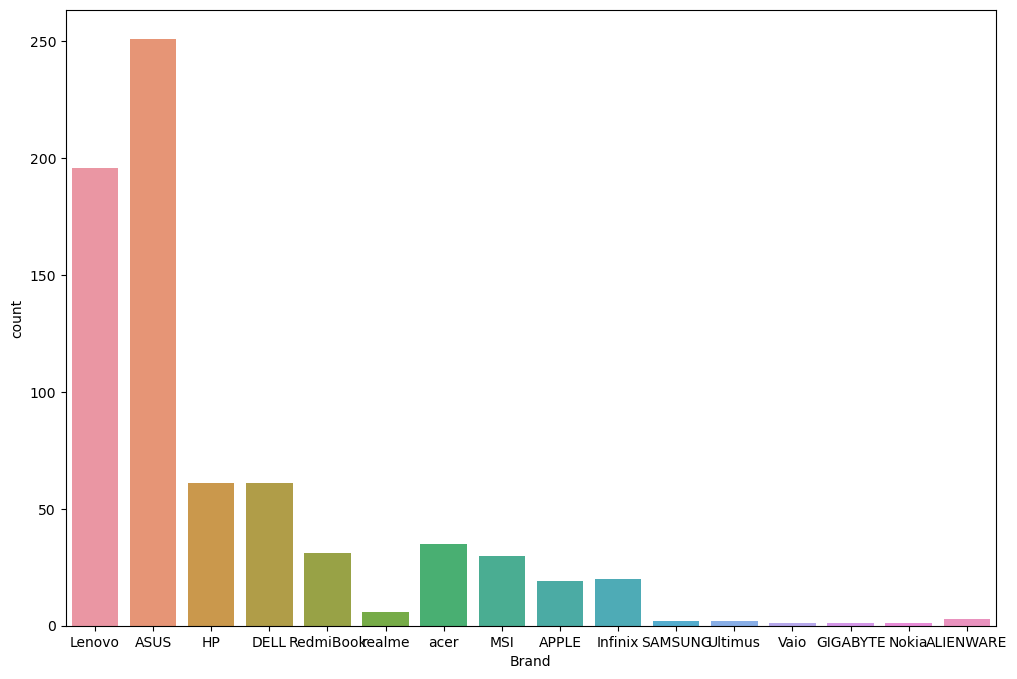

In [150]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['Brand'])

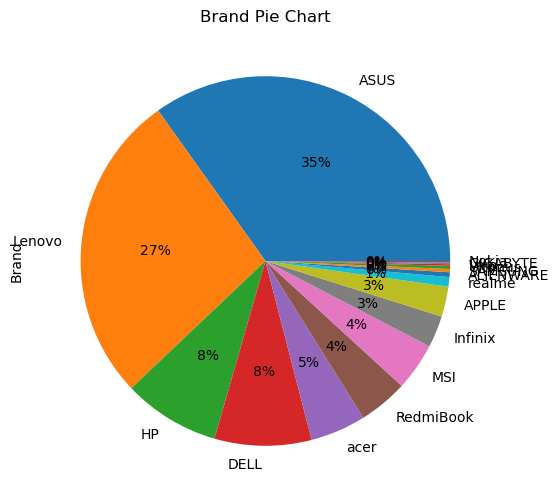

In [151]:
df['Brand'].value_counts().plot(kind='pie', autopct='%1.0f%%', title="Brand Pie Chart", figsize=(12,6))
plt.show()

Above plot shows that sales of asus brand labtop is highest compare to others

Text(0.5, 1.0, 'Price of Laptop by Brand Type')

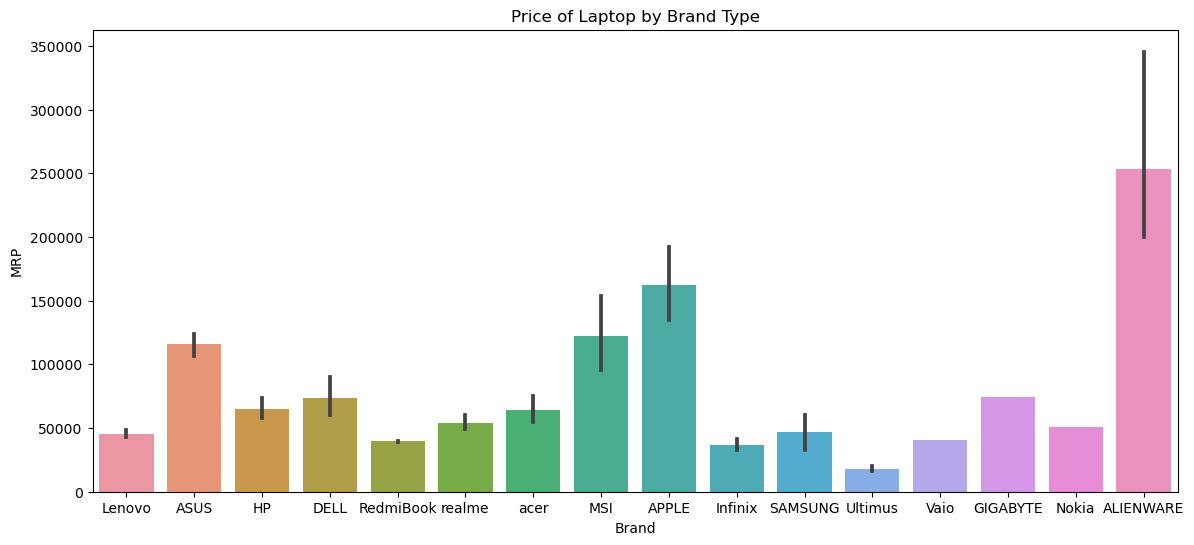

In [152]:
plt.figure(figsize=(14,6))
sns.barplot(x='Brand', y='MRP',data=df)
plt.title("Price of Laptop by Brand Type")

Above plot shows that prices of Alienware labtops are high.

Text(0.5, 1.0, 'Price of Laptop by OS Type')

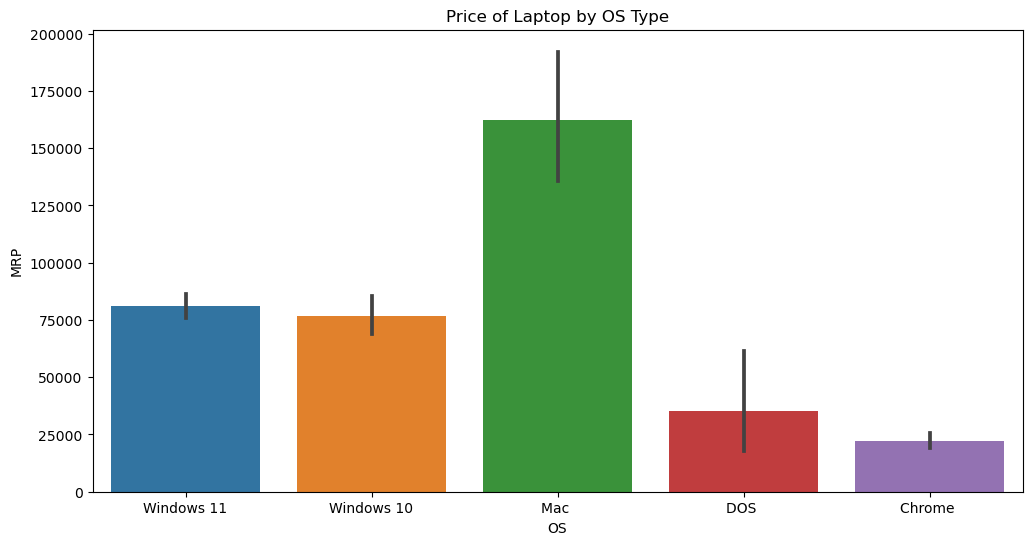

In [153]:
plt.figure(figsize=(12,6))
sns.barplot(x='OS', y='MRP',data=df)
plt.title("Price of Laptop by OS Type")

Mac os has the highest price among all the os


Text(0.5, 1.0, 'Price of Laptop by Processor Type')

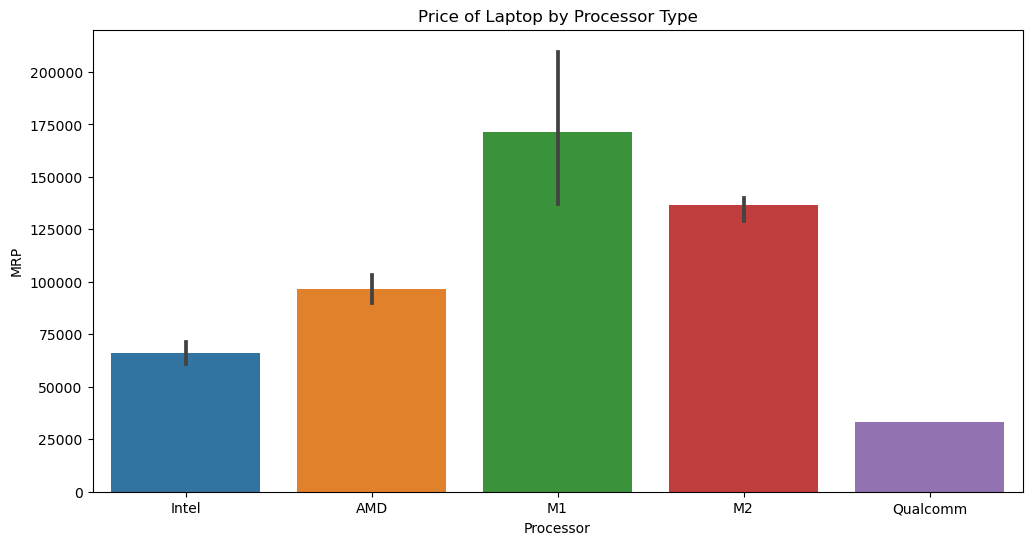

In [154]:
plt.figure(figsize=(12,6))
sns.barplot(x='Processor', y='MRP',data=df)
plt.title("Price of Laptop by Processor Type")

M1 processor has the highest price among all the processor.
Qualcomm processor has the lowest price among all the processor.

Text(0.5, 1.0, 'Price of Laptop by RAM_Size')

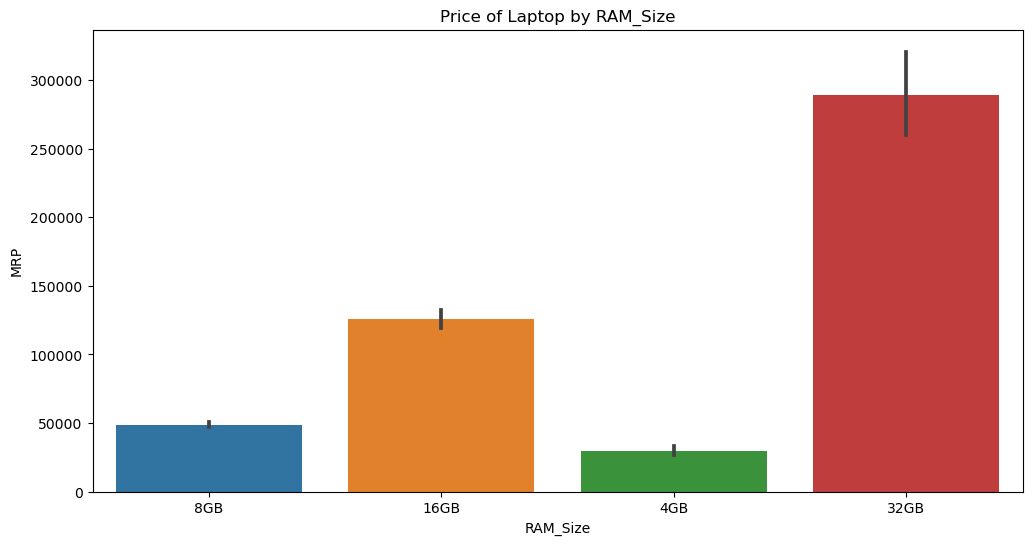

In [155]:
plt.figure(figsize=(12,6))
sns.barplot(x='RAM_Size', y='MRP',data=df)
plt.title("Price of Laptop by RAM_Size")

Price of 32gb size of ram is high.Higher the Ram size higher is the Price of laptop.

Text(0.5, 1.0, 'Price of Laptop by RAM_Type')

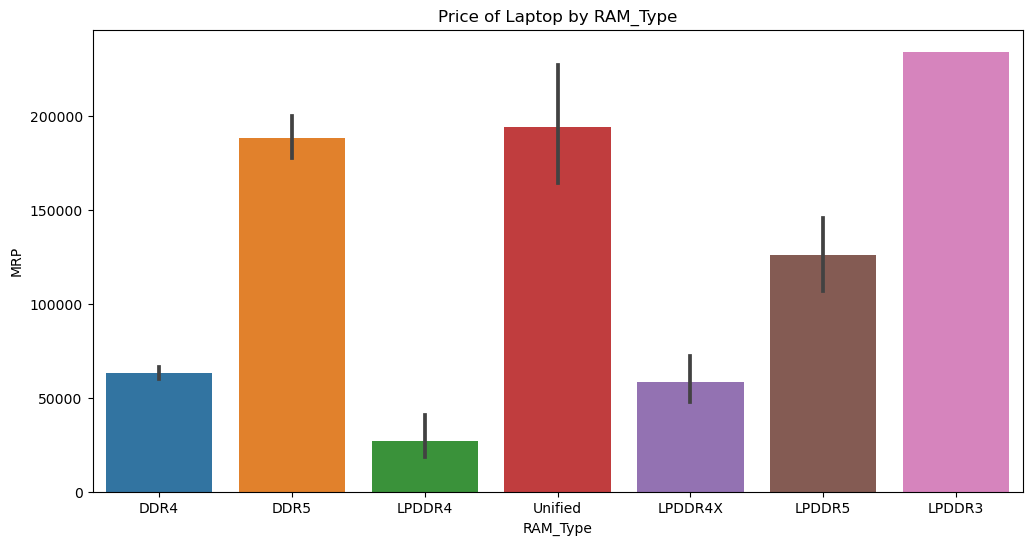

In [156]:
plt.figure(figsize=(12,6))
sns.barplot(x='RAM_Type', y='MRP',data=df)
plt.title("Price of Laptop by RAM_Type")

LPDDR3 RAM type has highest price.
LPDDR4 RAM type has lowest price

Text(0.5, 1.0, 'Price of Laptop by Storage_Size')

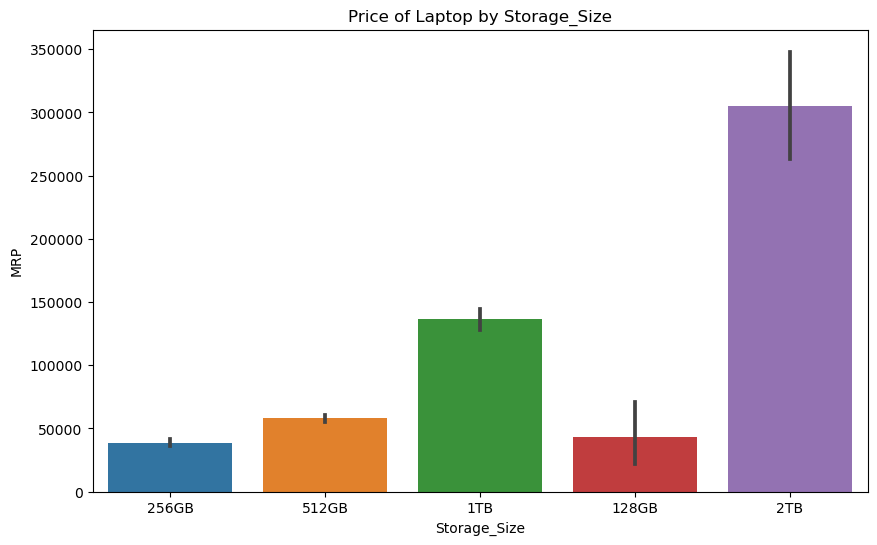

In [157]:
plt.figure(figsize=(10,6))
sns.barplot(x='Storage_Size', y='MRP',data=df)
plt.title("Price of Laptop by Storage_Size")

Labtop having storage size of 2TB has highest price.Higher the storage size higher is the Price of laptop.

Text(0.5, 1.0, 'Price of Laptop by Storage_type')

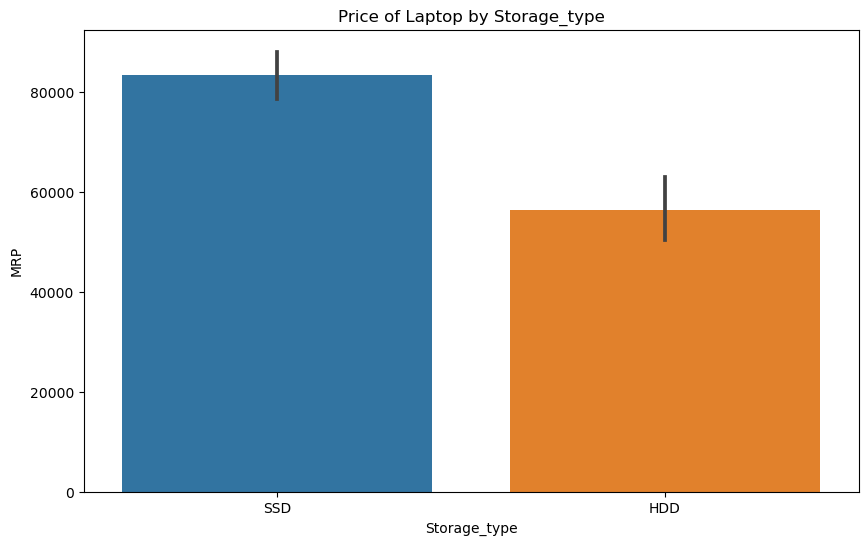

In [158]:
plt.figure(figsize=(10,6))
sns.barplot(x='Storage_type', y='MRP',data=df)
plt.title("Price of Laptop by Storage_type")

Price of SSD storage type labtops have highest price.

In [159]:
df

,MRP,Brand,OS,Processor,RAM_Type,RAM_Size,Storage_Size,Storage_type
0,36990.0,Lenovo,Windows 11,Intel,DDR4,8GB,256GB,SSD
1,39990.0,Lenovo,Windows 11,Intel,DDR4,8GB,512GB,SSD
2,32990.0,ASUS,Windows 11,Intel,DDR4,8GB,512GB,SSD
3,49990.0,HP,Windows 10,AMD,DDR4,8GB,512GB,SSD
4,49990.0,ASUS,Windows 11,Intel,DDR4,8GB,512GB,SSD
...,...,...,...,...,...,...,...,...
715,23490.0,ASUS,Chrome,Intel,LPDDR4,4GB,512GB,SSD
716,73490.0,Lenovo,Windows 11,AMD,DDR4,8GB,512GB,SSD
717,194990.0,ASUS,Windows 11,AMD,DDR5,16GB,1TB,SSD
718,125990.0,ASUS,Windows 11,Intel,LPDDR5,16GB,512GB,SSD


In [160]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [161]:
oh=OneHotEncoder()
ct= ColumnTransformer(transformers=[('oh',OneHotEncoder(sparse=False),["Brand","OS","Processor", "RAM_Type","Storage_type"])], remainder = "passthrough")

In [162]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('oh', OneHotEncoder(sparse=False),
                                 ['Brand', 'OS', 'Processor', 'RAM_Type',
                                  'Storage_type'])])

In [163]:
ct.get_feature_names


<bound method ColumnTransformer.get_feature_names of ColumnTransformer(remainder='passthrough',
                  transformers=[('oh', OneHotEncoder(sparse=False),
                                 ['Brand', 'OS', 'Processor', 'RAM_Type',
                                  'Storage_type'])])>

In [164]:
df=ct.fit_transform(df)


In [165]:
df=pd.DataFrame(df,columns=ct.get_feature_names())


In [166]:
df

,oh__x0_ALIENWARE,oh__x0_APPLE,oh__x0_ASUS,oh__x0_DELL,oh__x0_GIGABYTE,oh__x0_HP,oh__x0_Infinix,oh__x0_Lenovo,oh__x0_MSI,oh__x0_Nokia,...,oh__x3_LPDDR3,oh__x3_LPDDR4,oh__x3_LPDDR4X,oh__x3_LPDDR5,oh__x3_Unified,oh__x4_HDD,oh__x4_SSD,MRP,RAM_Size,Storage_Size
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36990.0,8GB,256GB
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39990.0,8GB,512GB
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32990.0,8GB,512GB
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49990.0,8GB,512GB
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49990.0,8GB,512GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,23490.0,4GB,512GB
716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,73490.0,8GB,512GB
717,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194990.0,16GB,1TB
718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,125990.0,16GB,512GB


In [167]:
oe = OrdinalEncoder(categories = [['128GB', '256GB','512GB','1TB','2TB'],['4GB','8GB','16GB','32GB']])

In [168]:
ct = ColumnTransformer(transformers = [('Ordinal Encoder',oe, ['Storage_Size','RAM_Size'])])

In [169]:
df[['Storage_Size','RAM_Size']]=ct.fit_transform(df)


In [170]:
df


,oh__x0_ALIENWARE,oh__x0_APPLE,oh__x0_ASUS,oh__x0_DELL,oh__x0_GIGABYTE,oh__x0_HP,oh__x0_Infinix,oh__x0_Lenovo,oh__x0_MSI,oh__x0_Nokia,...,oh__x3_LPDDR3,oh__x3_LPDDR4,oh__x3_LPDDR4X,oh__x3_LPDDR5,oh__x3_Unified,oh__x4_HDD,oh__x4_SSD,MRP,RAM_Size,Storage_Size
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36990.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39990.0,1.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32990.0,1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49990.0,1.0,2.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49990.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,23490.0,0.0,2.0
716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,73490.0,1.0,2.0
717,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194990.0,2.0,3.0
718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,125990.0,2.0,2.0


### Split into dependent and independent

In [171]:
X = df.drop(["MRP"], axis = 1)


In [172]:
y=df['MRP']

### Split into training and testing set


In [173]:
from sklearn.model_selection import train_test_split


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [175]:
X_train

,oh__x0_ALIENWARE,oh__x0_APPLE,oh__x0_ASUS,oh__x0_DELL,oh__x0_GIGABYTE,oh__x0_HP,oh__x0_Infinix,oh__x0_Lenovo,oh__x0_MSI,oh__x0_Nokia,...,oh__x3_DDR5,oh__x3_LPDDR3,oh__x3_LPDDR4,oh__x3_LPDDR4X,oh__x3_LPDDR5,oh__x3_Unified,oh__x4_HDD,oh__x4_SSD,RAM_Size,Storage_Size
183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
254,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
320,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0
527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


In [176]:
y_train

183     20990.0
254     74990.0
437     39990.0
24      65990.0
387     36990.0
         ...   
369     54300.0
320    196990.0
527     44990.0
125     53490.0
265     33990.0
Name: MRP, Length: 576, dtype: object

### Machine Learning Regression Models

### Linear Regression

In [177]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [178]:
from sklearn.metrics import mean_squared_error as mse, r2_score

MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test).round(2)

results=pd.DataFrame({"Model":["Linear Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,5.163881e+08,22724.18,0.84


### KNN Regressor

In [179]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=3)
knn=knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [180]:
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test).round(2)

result=pd.DataFrame({"Model":["KNN Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})
results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,5.163881e+08,22724.18,0.84
0,KNN Regression,4.861648e+08,22049.15,0.82


### Decision Tree

In [181]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [182]:
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test).round(2)

result=pd.DataFrame({"Model":["Decision Tree Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,5.163881e+08,22724.18,0.84
0,KNN Regression,4.861648e+08,22049.15,0.82
0,Decision Tree Regression,7.560561e+08,27496.47,0.80


### Random Forest

In [183]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [184]:
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test).round(2)

result=pd.DataFrame({"Model":["Random Forest Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,5.163881e+08,22724.18,0.84
0,KNN Regression,4.861648e+08,22049.15,0.82
0,Decision Tree Regression,7.560561e+08,27496.47,0.80
0,Random Forest Regression,6.062551e+08,24622.25,0.83


### Gradient boosting

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

grb= GradientBoostingRegressor(n_estimators =100,random_state =0) 
grb.fit(X_train, y_train) 
y_pred = grb.predict(X_test)

In [186]:
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test)

result=pd.DataFrame({"Model":["Gradient Boosting Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results

,Model,MSE,RMSE,R2 Score
0,Linear Regression,5.163881e+08,22724.18,0.840000
0,KNN Regression,4.861648e+08,22049.15,0.820000
0,Decision Tree Regression,7.560561e+08,27496.47,0.800000
0,Random Forest Regression,6.062551e+08,24622.25,0.830000
0,Gradient Boosting Regression,5.179801e+08,22759.18,0.861599


### ADA Boost

In [187]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=100,learning_rate=0.001,random_state=0)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)

In [188]:
MSE=mse(y_pred,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
R2=r2_score(y_pred, y_test)

result=pd.DataFrame({"Model":["ADA Boost Regression"], "MSE":[MSE], "RMSE":[RMSE], "R2 Score":[R2]})

results=pd.concat([results,result])
results


,Model,MSE,RMSE,R2 Score
0,Linear Regression,5.163881e+08,22724.18,0.840000
0,KNN Regression,4.861648e+08,22049.15,0.820000
0,Decision Tree Regression,7.560561e+08,27496.47,0.800000
0,Random Forest Regression,6.062551e+08,24622.25,0.830000
0,Gradient Boosting Regression,5.179801e+08,22759.18,0.861599
0,ADA Boost Regression,7.609950e+08,27586.14,0.782461


## Gradient Boosting Regression  has high R2 score and low RMSE, tune this model and select this to predict the price of Laptop.

## Cross validation to check model performace

In [189]:
from sklearn.model_selection import GridSearchCV

In [190]:
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit
gbr = GradientBoostingRegressor(n_estimators=2000,learning_rate=0.1,subsample=1,max_depth=1,random_state=1)
k=ShuffleSplit(n_splits=20, test_size=0.2, random_state=20)
score=cross_val_score(gbr, X,y, cv=k,n_jobs=1)

print("Cross validations Score:\n", score)
print("Average Cross validations Score:", score.mean())
print("Maximum Cross validations Score:", score.max())
print("Minimum Cross validations Score:", score.min())

Cross validations Score:
 [0.8870383  0.84772616 0.88340206 0.92283244 0.87801558 0.90789656
 0.82073464 0.88628643 0.82732007 0.90784691 0.77139137 0.84755846
 0.90583215 0.83296043 0.83310428 0.87213962 0.84375653 0.90704362
 0.87613359 0.84623562]
Average Cross validations Score: 0.8652627410264838
Maximum Cross validations Score: 0.9228324367785888
Minimum Cross validations Score: 0.7713913712486298


## Applying cross validation model performance is improved, R2 Score increased.

## Grid Search CV to tune the hyperparameter

In [191]:
from sklearn.model_selection import GridSearchCV
gbr = GradientBoostingRegressor()
parameters = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
grid_search_cv=GridSearchCV(gbr,param_grid=parameters)
search = grid_search_cv.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 1000,
 'random_state': 1,
 'subsample': 0.5}

In [192]:
gbr = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,subsample=0.5,max_depth=4,random_state=1)
gbr=gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

print('R2 score :',r2_score(y_pred_gbr,y_test))
MSE=mse(y_pred_gbr,y_test).round(2)
RMSE=np.sqrt(MSE).round(2)
print('MSE :',mse(y_pred_gbr,y_test).round(2))
print('RMSE:',np.sqrt(MSE).round(2))

R2 score : 0.8559455171588517
MSE : 536124439.79
RMSE: 23154.36
